In [86]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_excel("C://Users/thdar/OneDrive/Desktop/Dataset.xlsx")

In [58]:
df.head(20)

,Temperature,Pressure,Vibration,Humidity,Failure
0,23.75594,111.47800,0.590529,42.99730,0
1,18.38782,108.31190,0.561806,26.16201,0
2,25.86647,86.78422,0.434486,40.09598,0
3,21.07013,104.74830,0.602397,38.64469,0
4,22.74969,95.66371,0.553688,42.28409,0
5,30.34244,79.22299,0.609872,33.72522,0
6,24.16797,103.43540,0.661001,35.63722,0
7,27.09932,102.99260,0.588867,35.12106,0
8,30.38318,93.97355,0.575627,44.79611,0
9,16.84732,116.73700,0.536841,47.57565,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8736 non-null   float64
 1   Pressure     8735 non-null   float64
 2   Vibration    8736 non-null   float64
 3   Humidity     8737 non-null   float64
 4   Failure      8737 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 341.4 KB


In [51]:
df.describe()

,Temperature,Pressure,Vibration,Humidity,Failure
count,8736.000000,8735.000000,8736.000000,8737.000000,8737.000000
mean,24.960516,99.957752,0.498596,49.952651,0.048758
std,4.993388,10.084239,0.099607,10.079885,0.215374
min,6.313690,65.066580,0.079308,13.891700,0.000000
25%,21.558798,93.148210,0.430964,43.164120,0.000000
50%,24.915625,99.825890,0.496722,50.106130,0.000000
75%,28.377803,106.606850,0.564973,56.657680,0.000000
max,42.485070,143.457700,0.901997,95.738160,1.000000


### Features of Dataset
- given data is numerical type.
- target variable is Faliure: that shows if a equipment has failed or not.

In [52]:
df.isnull().sum()

Temperature    1
Pressure       2
Vibration      1
Humidity       0
Failure        0
dtype: int64

In [53]:
data = df.fillna(data.mean())

In [55]:
data.isnull().sum()

Temperature    0
Pressure       0
Vibration      0
Humidity       0
Failure        0
dtype: int64

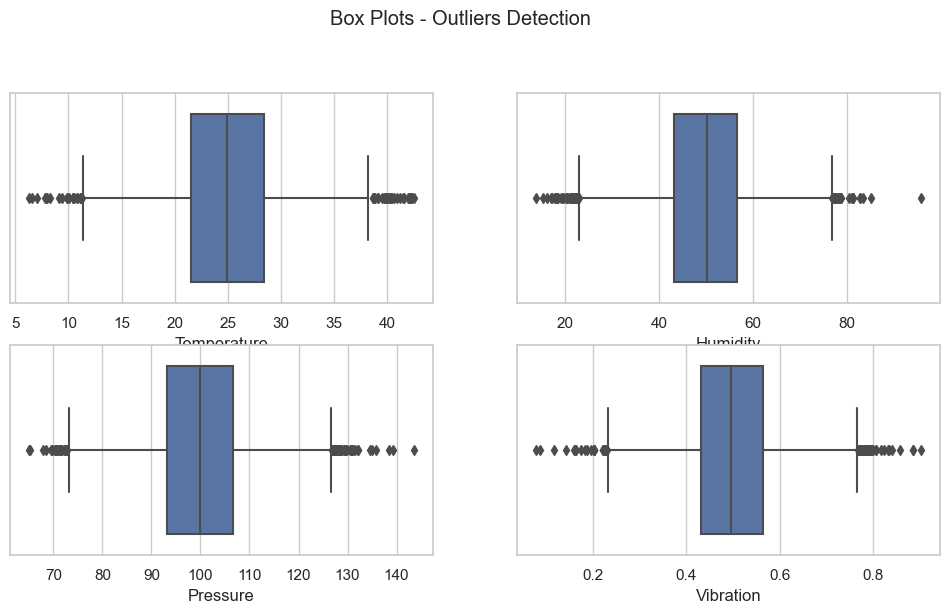

In [56]:
# Box plots for each variable
plt.figure(figsize=(12, 6))

# Box plot for 'temp'
plt.subplot(2, 2, 1)
sns.boxplot(x=data['Temperature'])

# Box plot for 'humid'
plt.subplot(2, 2, 2)
sns.boxplot(x=data['Humidity'])

# Box plot for 'pressure'
plt.subplot(2, 2, 3)
sns.boxplot(x=data['Pressure'])

# Box plot for 'vibration'
plt.subplot(2, 2, 4)
sns.boxplot(x=data['Vibration'])

plt.suptitle('Box Plots - Outliers Detection',y = 1.02)
plt.show()

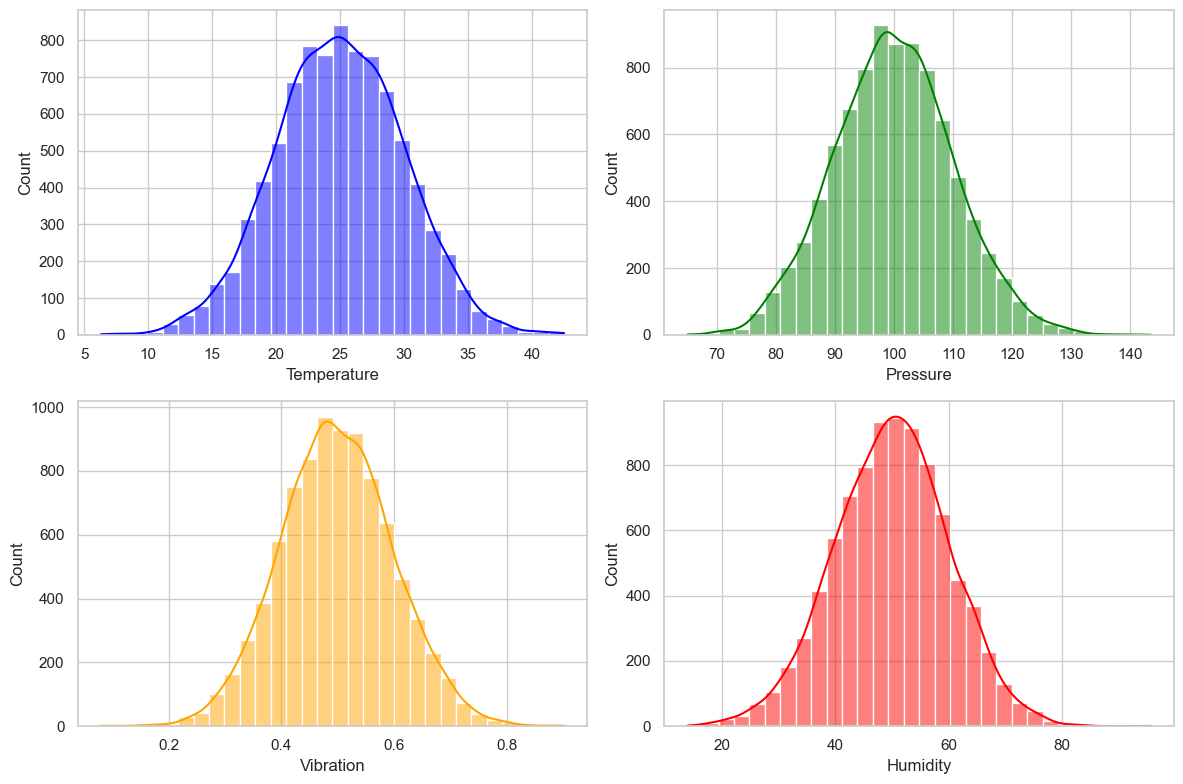

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['Temperature'], kde=True, color='blue', bins=30)

plt.subplot(2, 2, 2)
sns.histplot(data['Pressure'], kde=True, color='green', bins=30)

plt.subplot(2, 2, 3)
sns.histplot(data['Vibration'], kde=True, color='orange', bins=30)

plt.subplot(2, 2, 4)
sns.histplot(data['Humidity'], kde=True, color='red', bins=30)

plt.tight_layout()
plt.show()

## distributions
- Distributions of the given indepenednt variable is Normal Distribution

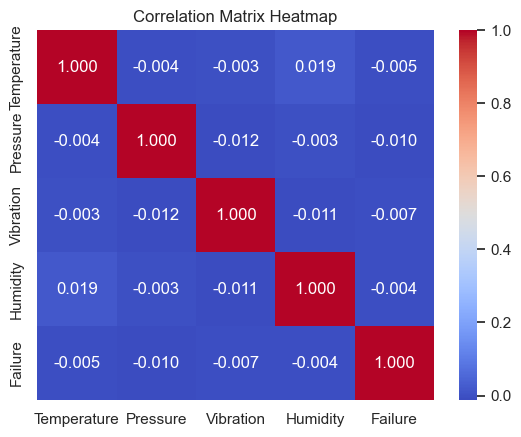

In [93]:

# Correlation matrix heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION**: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**NEGATIVE CORRELATION** : If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

In [71]:
X= data.drop(['Temperature','Pressure','Vibration','Humidity'],axis =1)
y = data.Failure

In [72]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train multiple regression models using different algorithms and hyperparameters

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Support Vector Machine Regressor
svm_regressor = SVR(kernel='linear', C=1)
svm_regressor.fit(X_train, y_train)


# Ensemble using Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('Random Forest', rf_regressor),
    ('Gradient Boosting', gb_regressor),
    ('SVM', svm_regressor)
])

voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(random_state=42)),
                            ('Gradient Boosting',
                             GradientBoostingRegressor(random_state=42)),
                            ('SVM', SVR(C=1, kernel='linear'))])

#### Ensemble techniques involve combining predictions from multiple models to create a stronger, more robust model.

In [79]:
# Make predictions on the test set
rf_pred = rf_regressor.predict(X_test)
gb_pred = gb_regressor.predict(X_test)
svm_pred = svm_regressor.predict(X_test)
voting_pred = voting_regressor.predict(X_test)

### Evaluate the Performance

In [80]:
# Evaluate the performance of individual models
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, gb_pred)))
print("SVM RMSE:", np.sqrt(mean_squared_error(y_test, svm_pred)))
print("Voting Regressor RMSE:", np.sqrt(mean_squared_error(y_test, voting_pred)))

# R-squared (coefficient of determination) for the Voting Regressor
r2_voting = r2_score(y_test, voting_pred)
print("Voting Regressor R-squared:", r2_voting)

Random Forest RMSE: 0.0
Gradient Boosting RMSE: 5.807948130262446e-06
SVM RMSE: 0.0999999965374701
Voting Regressor RMSE: 0.033334163026557735
Voting Regressor R-squared: 0.9767581225679156


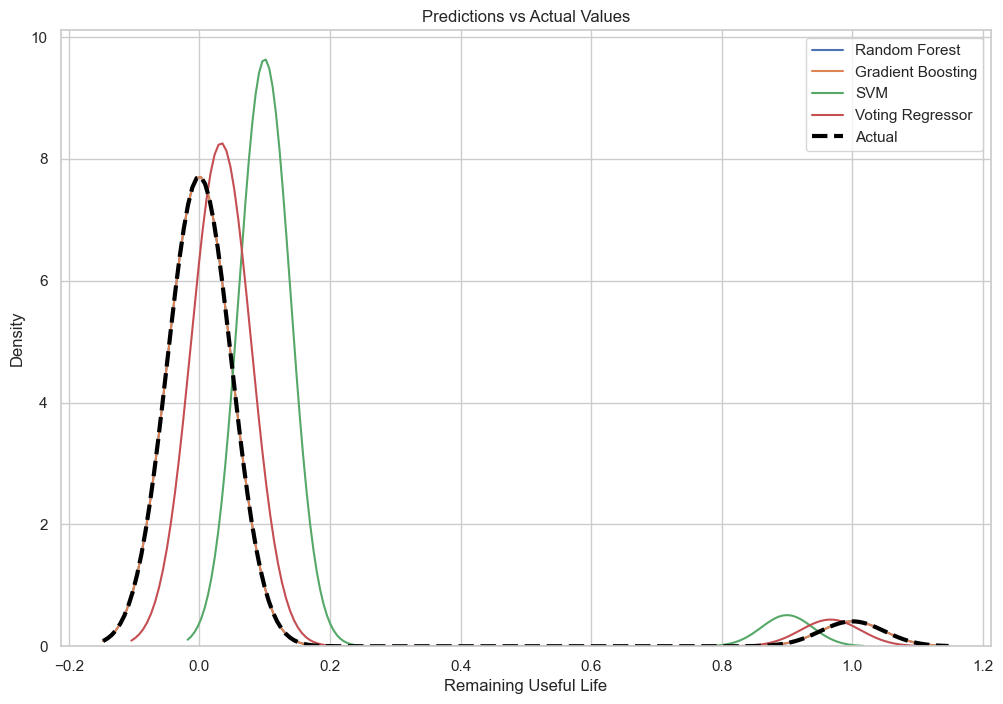

In [81]:
# Create a DataFrame to store predictions and actual values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred,
    'SVM': svm_pred,
    'Voting Regressor': voting_pred
})

# Plot predictions vs actual values
plt.figure(figsize=(12, 8))
for model in predictions_df.columns[1:]:
    sns.kdeplot(data=predictions_df, x=model, label=model)

sns.kdeplot(data=predictions_df, x='Actual', label='Actual', linewidth=3, linestyle='--', color='black')
plt.title('Predictions vs Actual Values')
plt.xlabel('Remaining Useful Life')
plt.ylabel('Density')
plt.legend()
plt.show()

### if you want to choose the best model based on Root Mean Squared Error (RMSE) scores, you should look for the model with the lowest RMSE, as lower RMSE values indicate better predictive performance

In [90]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
voting_rmse = np.sqrt(mean_squared_error(y_test, voting_pred))

# Print RMSE for each model
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)
print("SVM RMSE:", svm_rmse)
print("Voting Regressor RMSE:", voting_rmse)

# Determine the best model
best_model = min(rf_rmse, gb_rmse, svm_rmse, voting_rmse)
print("The best model is the one with RMSE:", best_model)

Random Forest RMSE: 0.0
Gradient Boosting RMSE: 5.807948130262446e-06
SVM RMSE: 0.0999999965374701
Voting Regressor RMSE: 0.033334163026557735
The best model is the one with RMSE: 0.0


In [91]:
# Define the regression models
models = [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('SVM', SVR(kernel='linear', C=1)),
    ('Voting Regressor', VotingRegressor(estimators=[
        ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('SVM', SVR(kernel='linear', C=1)),
    ]))
]

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for model_name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')  # Using negative MSE as scikit-learn cross_val_score returns negated values
    cv_rmse = np.sqrt(-cv_results.mean())
    print(f"{model_name} Cross-Validation RMSE: {cv_rmse}")

# If you want to use a different scoring metric, you can replace 'neg_mean_squared_error' with another scoring metric


Random Forest Cross-Validation RMSE: -0.0
Gradient Boosting Cross-Validation RMSE: 5.720614340651087e-06
SVM Cross-Validation RMSE: 0.09999999652525844
Voting Regressor Cross-Validation RMSE: 0.03333415354908806


In [95]:
import pickle

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)

with open('gb_model.pkl', 'wb') as file:
    pickle.dump(gb_regressor, file)

with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_regressor, file)

with open('voting_model.pkl', 'wb') as file:
    pickle.dump(voting_regressor, file)